# Exercise 3 - Pandas MPG dataset

In [1]:
import pandas as pd
import seaborn as sns

pd.set_option('display.max_rows', None)

In [2]:
df = sns.load_dataset('mpg')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
df[df['horsepower'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [5]:
df['origin'].value_counts()

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

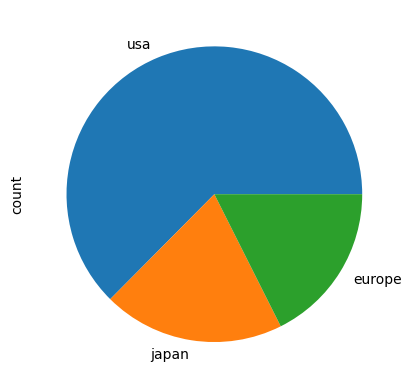

In [75]:
df['origin'].value_counts().plot(kind='pie');

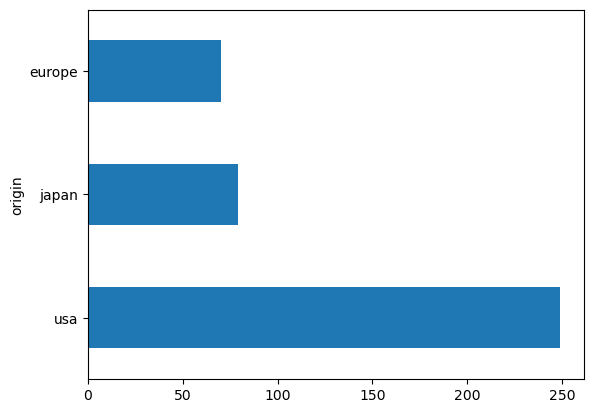

In [76]:
df['origin'].value_counts().plot(kind='barh');

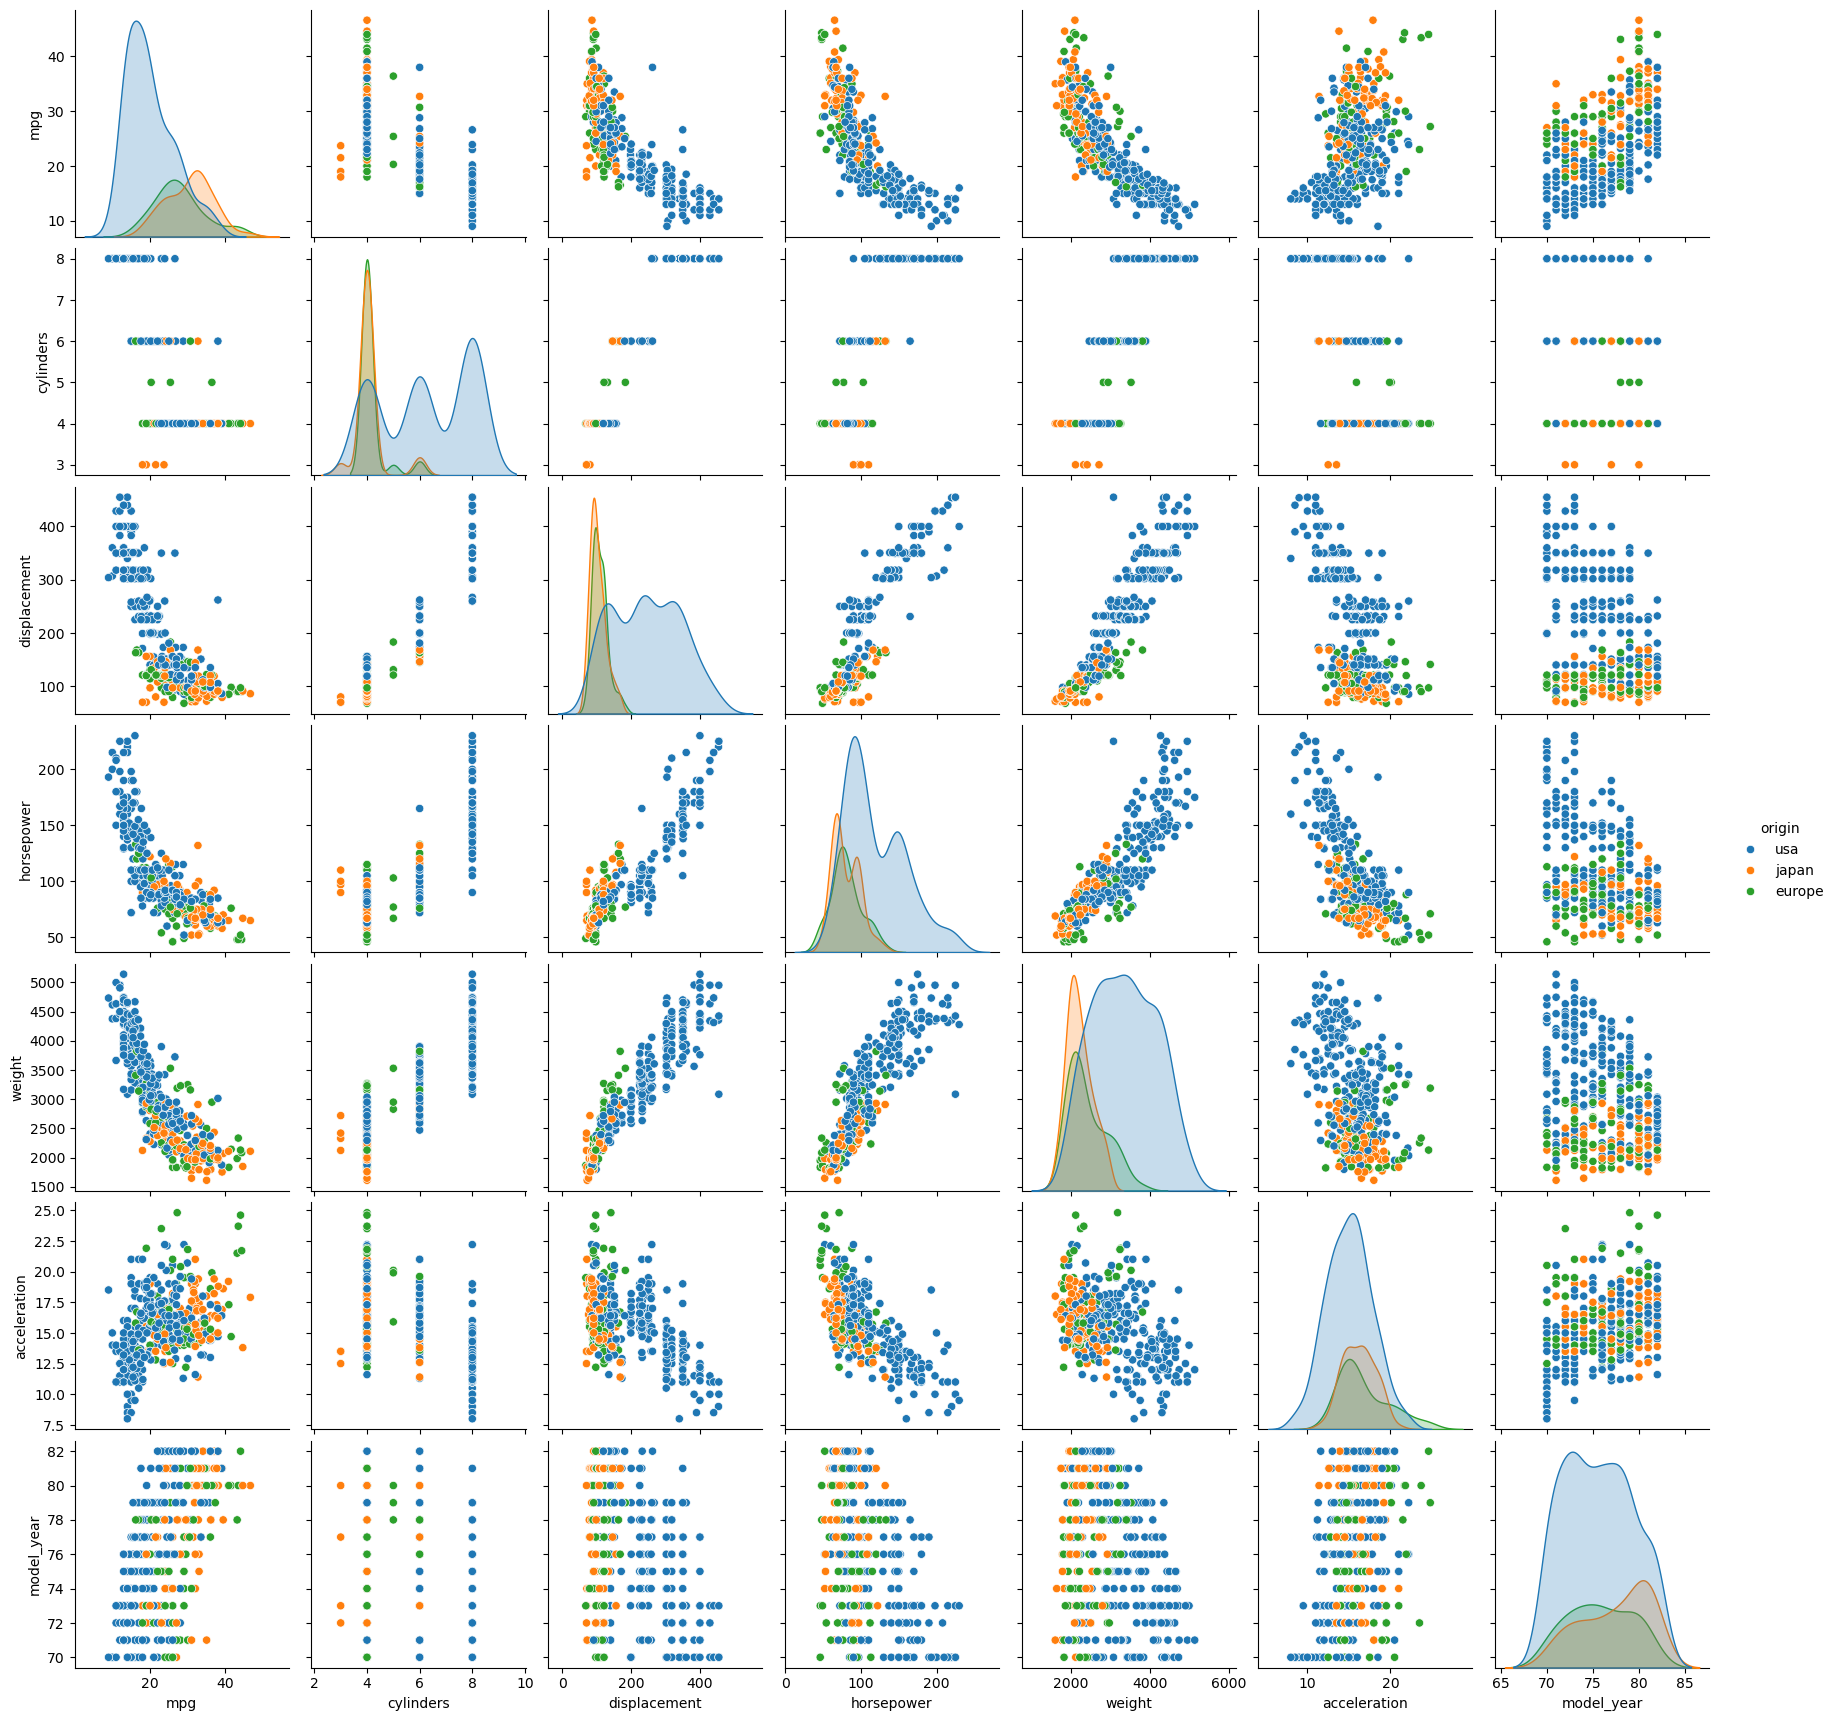

In [77]:
sns.pairplot(df, hue='origin');

In [78]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [79]:
'chevrolet chevelle malibu'.split(maxsplit=1)

['chevrolet', 'chevelle malibu']

In [80]:
df[['make', 'model']] = df['name'].str.split(n=1, expand=True)

In [81]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,make,model
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford,torino


In [82]:
df['make'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [83]:
typos = {
    "toyouta": "toyota",
    "maxda": "mazda",
    "chevroelt": "chevrolet",
    "chevy": "chevrolet",
    "vokswagen": "volkswagen",
    "hi": "hi",
    "capri": "ford capri",
    "mercedes-benz": "mercedes",
}

In [84]:
df['make'] = df['make'].replace(typos)

In [85]:
df['make'].value_counts()

make
ford          51
chevrolet     47
plymouth      31
amc           28
dodge         28
toyota        26
datsun        23
buick         17
pontiac       16
volkswagen    16
honda         13
mazda         12
mercury       11
oldsmobile    10
fiat           8
peugeot        8
audi           7
vw             6
chrysler       6
volvo          6
renault        5
saab           4
opel           4
subaru         4
mercedes       3
cadillac       2
bmw            2
ford capri     1
hi             1
triumph        1
nissan         1
Name: count, dtype: int64

In [86]:
df = df.sort_values(['origin','make']).reset_index(drop=True)

In [68]:
df.rename(columns=str.capitalize, inplace=True)

In [97]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,make,model
0,24.0,4,107.0,90.0,2430,14.5,70,europe,audi 100 ls,audi,100 ls
1,20.0,4,114.0,91.0,2582,14.0,73,europe,audi 100ls,audi,100ls
2,29.0,4,98.0,83.0,2219,16.5,74,europe,audi fox,audi,fox
3,23.0,4,115.0,95.0,2694,15.0,75,europe,audi 100ls,audi,100ls
4,20.3,5,131.0,103.0,2830,15.9,78,europe,audi 5000,audi,5000
...,...,...,...,...,...,...,...,...,...,...,...
393,19.2,6,231.0,105.0,3535,19.2,78,usa,pontiac phoenix lj,pontiac,phoenix lj
394,21.5,6,231.0,115.0,3245,15.4,79,usa,pontiac lemans v6,pontiac,lemans v6
395,33.5,4,151.0,90.0,2556,13.2,79,usa,pontiac phoenix,pontiac,phoenix
396,31.0,4,112.0,85.0,2575,16.2,82,usa,pontiac j2000 se hatchback,pontiac,j2000 se hatchback


In [104]:
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,make,model
0,24.0,4,107.0,90.0,2430,14.5,70,europe,audi 100 ls,audi,100 ls
1,20.0,4,114.0,91.0,2582,14.0,73,europe,audi 100ls,audi,100ls
2,29.0,4,98.0,83.0,2219,16.5,74,europe,audi fox,audi,fox
3,23.0,4,115.0,95.0,2694,15.0,75,europe,audi 100ls,audi,100ls
4,20.3,5,131.0,103.0,2830,15.9,78,europe,audi 5000,audi,5000
5,34.3,4,97.0,78.0,2188,15.8,80,europe,audi 4000,audi,4000
6,36.4,5,121.0,67.0,2950,19.9,80,europe,audi 5000s (diesel),audi,5000s (diesel)
7,26.0,4,121.0,113.0,2234,12.5,70,europe,bmw 2002,bmw,2002
8,21.5,4,121.0,110.0,2600,12.8,77,europe,bmw 320i,bmw,320i
9,30.0,4,88.0,76.0,2065,14.5,71,europe,fiat 124b,fiat,124b


In [105]:
df[['origin','make','model']]

,origin,make,model
0,europe,audi,100 ls
1,europe,audi,100ls
2,europe,audi,fox
3,europe,audi,100ls
4,europe,audi,5000
5,europe,audi,4000
6,europe,audi,5000s (diesel)
7,europe,bmw,2002
8,europe,bmw,320i
9,europe,fiat,124b


In [106]:
df[df['origin']=='usa']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,make,model
149,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc,rebel sst
150,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl,amc,ambassador dpl
151,18.0,6,199.0,97.0,2774,15.5,70,usa,amc hornet,amc,hornet
152,21.0,6,199.0,90.0,2648,15.0,70,usa,amc gremlin,amc,gremlin
153,19.0,6,232.0,100.0,2634,13.0,71,usa,amc gremlin,amc,gremlin
154,18.0,6,232.0,100.0,3288,15.5,71,usa,amc matador,amc,matador
155,18.0,6,258.0,110.0,2962,13.5,71,usa,amc hornet sportabout (sw),amc,hornet sportabout (sw)
156,17.0,8,304.0,150.0,3672,11.5,72,usa,amc ambassador sst,amc,ambassador sst
157,15.0,8,304.0,150.0,3892,12.5,72,usa,amc matador (sw),amc,matador (sw)
158,14.0,8,304.0,150.0,3672,11.5,73,usa,amc matador,amc,matador


In [112]:
df.loc[0:11, ['origin','make','model']]

,origin,make,model
0,europe,audi,100 ls
1,europe,audi,100ls
2,europe,audi,fox
3,europe,audi,100ls
4,europe,audi,5000
5,europe,audi,4000
6,europe,audi,5000s (diesel)
7,europe,bmw,2002
8,europe,bmw,320i
9,europe,fiat,124b


In [119]:
df.drop(labels=[7,8], axis=0, inplace=True)

In [120]:
df.loc[0:11, ['origin','make','model']]

,origin,make,model
0,europe,audi,100 ls
1,europe,audi,100ls
2,europe,audi,fox
3,europe,audi,100ls
4,europe,audi,5000
5,europe,audi,4000
6,europe,audi,5000s (diesel)
9,europe,fiat,124b
10,europe,fiat,124 sport coupe
11,europe,fiat,128


In [123]:
df.iloc[0:11]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,make,model
0,24.0,4,107.0,90.0,2430,14.5,70,europe,audi 100 ls,audi,100 ls
1,20.0,4,114.0,91.0,2582,14.0,73,europe,audi 100ls,audi,100ls
2,29.0,4,98.0,83.0,2219,16.5,74,europe,audi fox,audi,fox
3,23.0,4,115.0,95.0,2694,15.0,75,europe,audi 100ls,audi,100ls
4,20.3,5,131.0,103.0,2830,15.9,78,europe,audi 5000,audi,5000
5,34.3,4,97.0,78.0,2188,15.8,80,europe,audi 4000,audi,4000
6,36.4,5,121.0,67.0,2950,19.9,80,europe,audi 5000s (diesel),audi,5000s (diesel)
9,30.0,4,88.0,76.0,2065,14.5,71,europe,fiat 124b,fiat,124b
10,26.0,4,98.0,90.0,2265,15.5,73,europe,fiat 124 sport coupe,fiat,124 sport coupe
11,29.0,4,68.0,49.0,1867,19.5,73,europe,fiat 128,fiat,128


In [124]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name', 'make', 'model'],
      dtype='object')

In [126]:
df.drop('name', axis='columns', inplace=True)

In [127]:
df.head(40)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,make,model
0,24.0,4,107.0,90.0,2430,14.5,70,europe,audi,100 ls
1,20.0,4,114.0,91.0,2582,14.0,73,europe,audi,100ls
2,29.0,4,98.0,83.0,2219,16.5,74,europe,audi,fox
3,23.0,4,115.0,95.0,2694,15.0,75,europe,audi,100ls
4,20.3,5,131.0,103.0,2830,15.9,78,europe,audi,5000
5,34.3,4,97.0,78.0,2188,15.8,80,europe,audi,4000
6,36.4,5,121.0,67.0,2950,19.9,80,europe,audi,5000s (diesel)
9,30.0,4,88.0,76.0,2065,14.5,71,europe,fiat,124b
10,26.0,4,98.0,90.0,2265,15.5,73,europe,fiat,124 sport coupe
11,29.0,4,68.0,49.0,1867,19.5,73,europe,fiat,128


In [132]:
df['origin'] = df['origin'].astype('category')

In [133]:
df.dtypes

mpg              float64
cylinders          int64
displacement     float64
horsepower       float64
weight             int64
acceleration     float64
model_year         int64
origin          category
make              object
model             object
dtype: object

In [146]:
df['weight_class'] = pd.cut(df['weight'], 
                            bins=[0, 2500, 3500, 10000], 
                            labels=['light', 'medium', 'heavy'])

In [148]:
pd.pivot_table(df,
               index='origin',
               columns='weight_class',
               aggfunc='size',
               fill_value=0,
               observed=False)

weight_class,light,medium,heavy
origin,,,
europe,44,22,2
japan,62,17,0
usa,40,102,107


In [152]:
df.groupby('origin', observed=True).agg({'weight':['min','mean','max']})

weight                   
          min         mean   max
origin                          
europe   1825  2423.485294  3820
japan    1613  2221.227848  2930
usa      1800  3361.931727  5140

In [11]:
%%timeit
df['name'].apply(lambda woord: woord[::-1])

71.6 μs ± 1.45 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [12]:
%%timeit
df['name'].str.slice(step=-1)

68 μs ± 496 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [29]:
getallen = [2,4,6,8,9] * 100
a = np.array(getallen)

In [33]:
%%timeit
kwardraten = []
for getal in getallen:
    kwardraten.append(getal ** 2)

11.6 μs ± 123 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [27]:
kwardraten

[4, 16, 36, 64, 81]

In [15]:
import numpy as np

In [16]:
a = np.array(getallen)
a

array([2, 4, 6, 8, 9])

In [34]:
%%timeit
a ** 2

459 ns ± 3.95 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [18]:
a * 100

array([200, 400, 600, 800, 900])

In [21]:
x = np.linspace(0, 10, 100)
y = np.sin(x) + 0.5 * np.sin(2*x)

In [23]:
import matplotlib.pyplot as plt

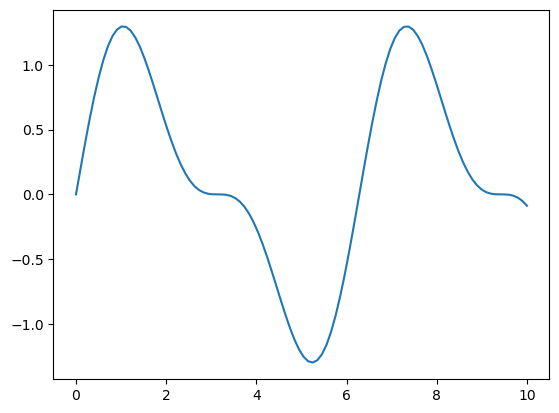

In [24]:
plt.plot(x, y)
plt.show()